# Act102 - Mathématiques actuarielles fondamentales de l'assurance vie

## Cours Table de Mortalité - Partie 3

Guillaume Gorge 2022
Cours du CNAM

<!-- https://www.markdownguide.org/basic-syntax/ -->


## Initialisation

#### Initialisation du système python

In [1]:
#import sys
#Stat Panda
#!{sys.executable} -m pip install pandas_profiling 
#Stat Assurance vie
#!{sys.executable} -m pip install lifelines    
#!{sys.executable} -m pip install seaborn  
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install plotnine
#pip install pylexis

In [ ]:
# Necessaire en Colab pour fonctionner avec Pandas excel
!pip install xlrd==1.2.0
!pip install  matplotlib -U
!pip install pylexis

In [2]:
import os

import pylexis
from plotnine import ggplot, geom_point, aes, geom_violin,theme,theme_minimal,geom_jitter,geom_segment


# packages classiques pour gérer des données
import pandas as pd
import numpy as np

# graphiques
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#option pour que les graphes apparaissent dans Jupyter

# Stat sur Panda
import pandas_profiling 


In [3]:
#option pour que les graphes apparaissent dans Jupyter
%matplotlib inline 

#### Adresse des répertoires
Adresse à personnaliser selon environnement

In [ ]:
 # Environnement Colab ATTENTION CHOISIR l'environnement COLAB ou l'ENVIRONNEMENT LOCAL
from google.colab import drive
drive.mount('/content/drive/')
#%cd /content/drive/MyDrive/

BASE_PATH = '/content/drive/MyDrive/DataActuariat' 
# Répertoire drive qui contient les fichiers

In [ ]:
# Environnement Local - ATTENTION CHOISIR l'environnement COLAB ou l'ENVIRONNEMENT LOCAL
BASE_PATH = 'C:/Users/guill/GitHub/RessourcesActuariat/ActuariatVieCNAM/DataActuariat'

In [4]:
# image and mask directories
DataName = f'{BASE_PATH}/FD_DEC_2019.csv'
VarName = f'{BASE_PATH}/varmod_DEC_2019.csv'
DataNameExpo = f'{BASE_PATH}/pop-totale-france-metro.xls'

### Lecture de la base Exposition
La base EXPOSITION est aussi appelé matrice $E(x,t)$.

In [5]:
EXPOData = pd.read_excel(DataNameExpo)  
# A noter, nous avons fait quelques retraitements de forme sur le fichier pour simplifier sa lecture#EXPOData.head()

In [6]:
# Fichier fourni par l'INSEE avec toutes les modalités
VarDataName = pd.read_csv(VarName,sep=';')  # dictionnaire des variables
# Fonction pour imprimer les modalités
def ImprimeModalite(feature,dfName = VarDataName):
    Mod = dfName.loc[dfName['COD_VAR']==feature]
    display(Mod[['COD_MOD','LIB_MOD']])


### Lecture de la base mortalité

In [7]:
DEATHData=pd.read_csv(DataName,sep=';')  


C:\Users\guill\GitHub\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (3,9,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
DEATHSynthese = DEATHData.groupby(["SEXE","ANAIS"])['SEXE'].count().rename('NombreMorts').to_frame()

In [9]:
EXPOMORTData = pd.merge(EXPOData[['SEXE','ANAIS','AGE','EXPOSITION','CENSURE']], DEATHSynthese, on=['SEXE','ANAIS'], how='left')
display(EXPOMORTData)

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts
0,1,2019,0,343009,False,1453
1,1,2018,1,348625,False,239
2,1,2017,2,354653,False,116
3,1,2016,3,366334,False,61
4,1,2015,4,376914,False,61
...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861
208,2,1917,102,2490,False,1151
209,2,1916,103,1396,False,754
210,2,1915,104,946,False,515


In [10]:
def CalculPxMethode2(df=EXPOMORTData):
    df['Lx'] = df['EXPOSITION']
    df['Lx1'] = df['EXPOSITION'] - df['NombreMorts']
        # Selon la definition de Px
    df['Px'] = df['Lx1']/df['Lx'] 
    df['Qx'] = (1-df['Lx1']/df['Lx']) 



CalculPxMethode2(df=EXPOMORTData)
EXPOMORTData

#df.expanding(..., method='table') pour travailler avec plusieurs variables

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts,Lx,Lx1,Px,Qx
0,1,2019,0,343009,False,1453,343009,341556,0.995764,0.004236
1,1,2018,1,348625,False,239,348625,348386,0.999314,0.000686
2,1,2017,2,354653,False,116,354653,354537,0.999673,0.000327
3,1,2016,3,366334,False,61,366334,366273,0.999833,0.000167
4,1,2015,4,376914,False,61,376914,376853,0.999838,0.000162
...,...,...,...,...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861,3852,1991,0.516874,0.483126
208,2,1917,102,2490,False,1151,2490,1339,0.537751,0.462249
209,2,1916,103,1396,False,754,1396,642,0.459885,0.540115
210,2,1915,104,946,False,515,946,431,0.455603,0.544397


# Lee Carter

[article](http://pagesperso.univ-brest.fr/~ailliot/doc_cours/M1EURIA/regression/leecarter.pdf)

http://rstudio-pubs-static.s3.amazonaws.com/466062_fda07a1b42af4793b1f75e4b87435e3a.html Lee carter en R

In [ ]:
import numpy as np


def lee_carter(rate, T, N, misc=False):

    logm_xt = np.log(rate).T

    a_x = logm_xt.sum(axis=1) / T
    z_xt = logm_xt - a_x.reshape(N, 1)

    U, S, V = np.linalg.svd(z_xt, full_matrices=True)

    bxkt = S[0] * np.dot(U[:, 0].reshape(N, 1), V[0, :].reshape(T, 1).T)
    eps = z_xt - bxkt

    logm_xt_lcfitted = bxkt + a_x.reshape(N, 1)

    b_x = U[:, 0]/U[:, 0].sum()
    k_t = V[0, :]*S[0]*U[:, 0].sum()
    a_x = a_x + k_t.sum()*b_x
    k_t = k_t - k_t.sum()

    kwargs = {"U": U, "S": S, "V": V, "logm_xt": logm_xt,
              "z_xt": z_xt, "eps": eps, "logm_xt_lcfitted": logm_xt_lcfitted}

    return (a_x, b_x, k_t, kwargs) if misc else (a_x, b_x, k_t)


https://github.com/andy971022/leecarter/blob/master/leecarter/leecarter.py

# Modèle de Cox : intégrer l'evolution de l'espérance de vie

#### import de Lifeline
https://lifelines.readthedocs.io/en/latest/
lifelines is a complete survival analysis library, written in pure Python. 


In [ ]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

In [ ]:

from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi



In [ ]:

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary

In [ ]:
# https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
cph = CoxPHFitter()
cph.fit(EXPOMORTData[(EXPOMORTData['AGE'].between(0,100))], duration_col='AGE', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary


# Exercices


 

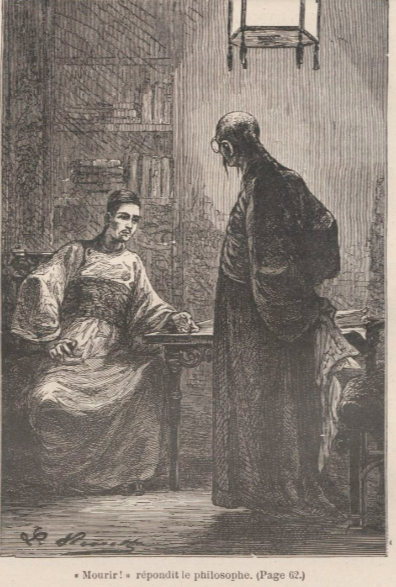

# Et si on ajoutait un état ?